## Wine Quality Prediction

Goal :->
Predict Wine Quality based on features like fixed acidity,volatile acidity,citric acid,pH and alcohol etc..

Model: Random Forest

We'll include:

1. Data collection
2. Data Visualization
3. Data preprocessing (label binarization)
4. Training the model
5. Evaluation (Accuracy)
6. Prediction

### Data Collection

In [38]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Number of rows and columns in the dataset
df.shape

(1599, 12)

In [5]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Visualization

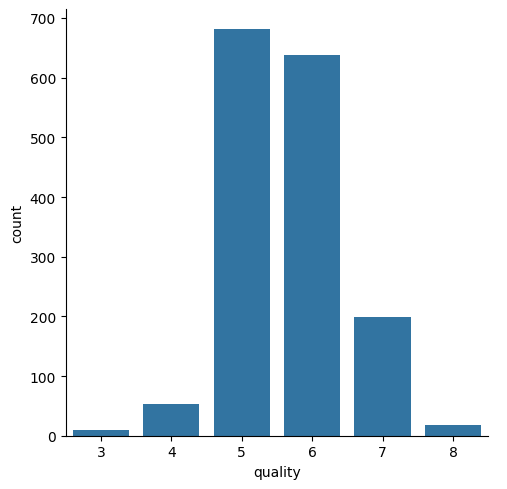

In [11]:
# Number of values in each quality category
sns.catplot(x='quality', data=df, kind='count')

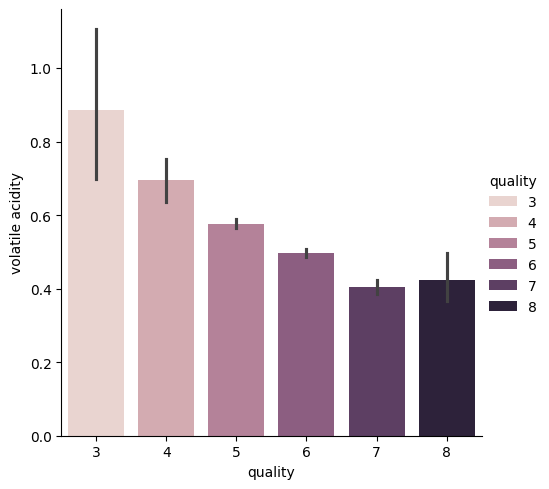

In [16]:
# Voltaile acidity vs Quality
sns.catplot(x='quality', y='volatile acidity',hue='quality', data=df, kind='bar')

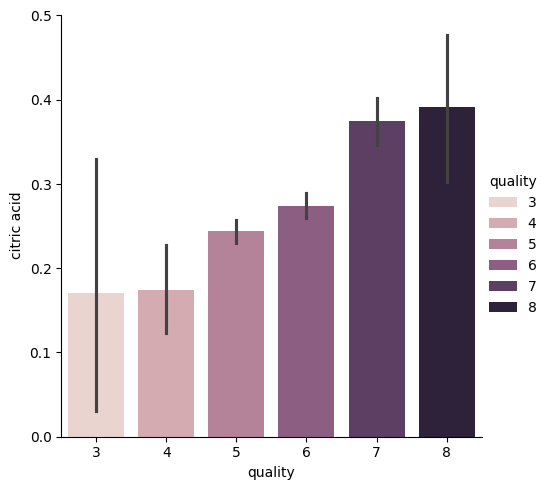

In [17]:
# Citric acidity vs Quality
sns.catplot(x='quality', y='citric acid',hue='quality', data=df, kind='bar')

Intrepectation : 

Based on the above two plots we conclude that quality of wine is inversly propotional to Volatile acitidy and directly propotional to citric acid likewise for better understanding you manually plots like this for other features understanding.

In [18]:
#plot the correlation of all the features

correlation = df.corr()

<Axes: >

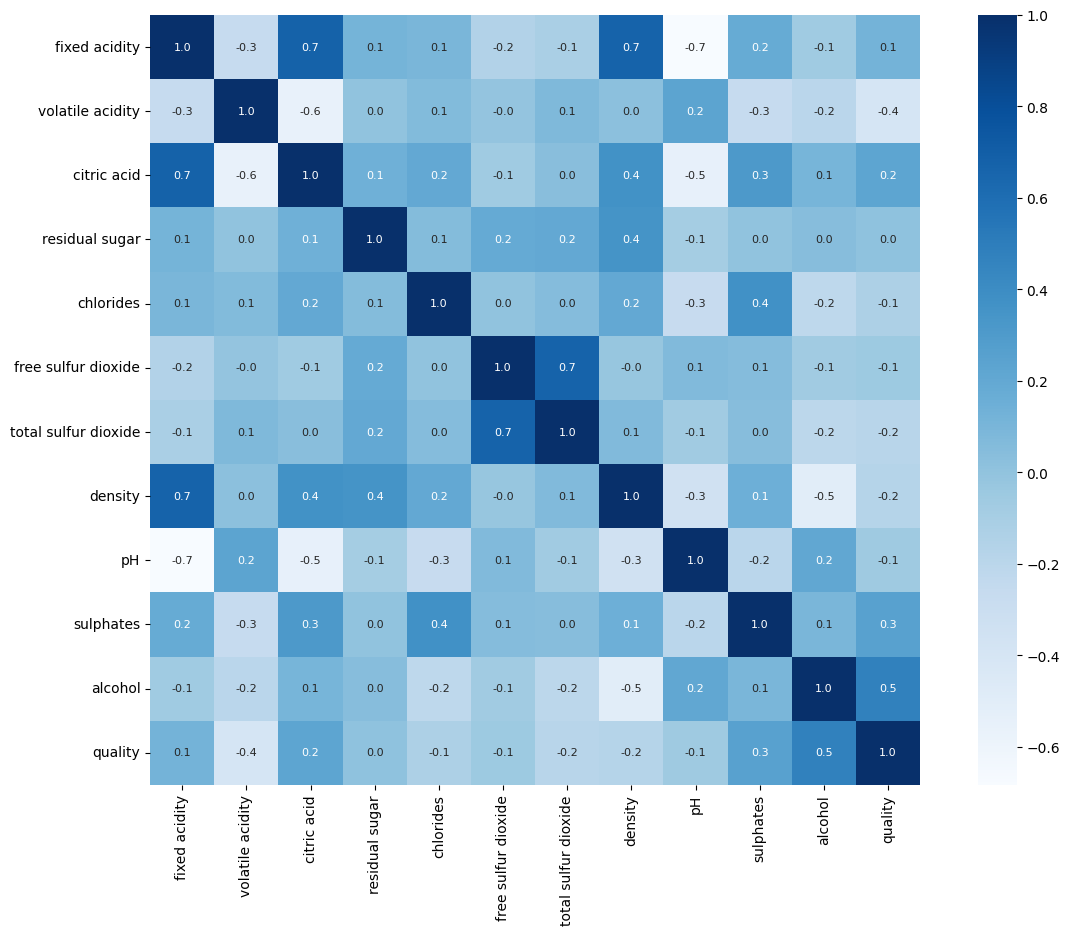

In [25]:
# constructing a heatmap to understand the correlation between the features
plt.figure(figsize=(15,10))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f', annot=True,  annot_kws={'size':8}, cmap='Blues')

### Data Preprocessing


In [ ]:
# Separate the features and target variable
X = df.drop('quality', axis=1)


In [28]:
# Label Binarization of the target variable
Y = df['quality'].apply(lambda y: 1 if y >= 7 else 0)

In [30]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Training the model

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [34]:
# training the random forest model
model = RandomForestClassifier()

In [35]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
# Model Evaluation

x_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(x_test_pred,Y_test)
print("Test Data Accuaracy: ",test_data_acc)

Test Data Accuaracy:  0.909375


### Build a predictive system

In [40]:
new_input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the tuple data into array 
new_input_data_array = np.asarray(new_input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = new_input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality wine")

[0]
Bad Quality wine


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
